In [173]:
import numpy as np
from matplotlib import pyplot as pp
import numpy.linalg as alg
from mpl_toolkits import mplot3d # a three-dimensional axes can be created

In [144]:
open('ex1data1.txt','r').readlines()[0:10]

['6.1101,17.592\n',
 '5.5277,9.1302\n',
 '8.5186,13.662\n',
 '7.0032,11.854\n',
 '5.8598,6.8233\n',
 '8.3829,11.886\n',
 '7.4764,4.3483\n',
 '8.5781,12\n',
 '6.4862,6.5987\n',
 '5.0546,3.8166\n']

In [145]:
data=open('ex1data1.txt','r').readlines()

In [146]:
X=[float(elm.split(',')[0]) for elm in data]
y=[float(elm.split(',')[1]) for elm in data]
m=len(y)

In [147]:
np.shape(X)

(97,)

In [148]:
def plotData(X,y):
    pp.plot(X,y,'rx')
    pp.xlabel('Profit in $10,000s')
    pp.ylabel('Population of City in 10,000s')
    pp.legend (['Training data'])
    pp.show()

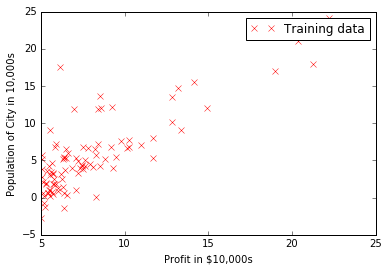

In [149]:
plotData(X,y)

In [150]:
def computeCost(X,y,theta):
    #X is the "design matrix" containing our training examples.
    # y is the class labels
    #m=np.shape(X)[0]  # number of training number
    predictions=np.dot(X,theta)  # predictions of hypothesis on all m examples
    sqrErrors=(predictions-y)*(predictions-y) # squared errors

    J=np.sum(sqrErrors)/(2*m)
    return J

In [151]:
theta=np.zeros((2,1),'d')
X=np.asarray(X)  # change the list to array
y=np.asarray(y)
y.shape=(97,1)
one=np.ones((m,1),'d')
X=np.c_[one,X]

In [152]:
computeCost(X,y,theta)

32.072733877455676

In [153]:
theta1=np.array([[-1],[2]])
computeCost(X,y,theta1)

54.24245508201238

In [154]:
iterations=1500
alpha=0.01

In [155]:
def gradientDescent(X,y,theta,alpha,num_iters):
    # this is the function to perform gradient descent to learn
    theta
    m=len(y)
    J_history=np.zeros((num_iters,1),'d')
    X1=np.delete(X,np.s_[0],1)  # remove the first column of matrix
    
    for iter in range(1,num_iters+1):
        predictions=np.dot(X,theta)
        deriv0=predictions-y
        deriv1=(predictions-y)*X1  # matrix element multiply
        
        tempo0=theta[0]-alpha/m*np.sum(deriv0)
        tempo1=theta[1]-alpha/m*np.sum(deriv1)
        theta[0]=tempo0
        theta[1]=tempo1
        
        J_history[iter-1]=computeCost(X,y,theta)
    return theta, J_history  

In [156]:
theta,J_history=gradientDescent(X, y, theta, alpha, iterations)
theta, J_history

(array([[-3.63029144],
        [ 1.16636235]]), array([[6.73719046],
        [5.93159357],
        [5.90115471],
        ...,
        [4.48343473],
        [4.48341145],
        [4.48338826]]))

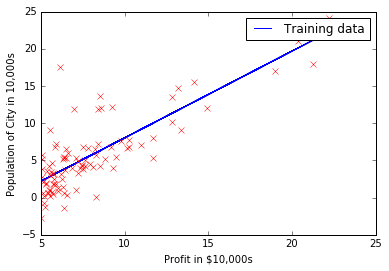

In [157]:
pp.plot(X[:,1],np.dot(X,theta),)
pp.legend (['Linear regression'])
plotData(X1,y)

prediction values for population sizes of 35000 and 70000

In [158]:
predict1=np.dot(np.array([1,3.5]),theta)
print ('For population =35000, we predict a profit of %f\n',predict1*10000)

For population =35000, we predict a profit of %f
 [4519.7678677]


In [160]:
predict2=np.dot(np.array([1,7]),theta)
print ('For population =70000, we predict a profit of %f\n',predict2*10000)

For population =70000, we predict a profit of %f
 [45342.45012945]


In [162]:
# visualizing J(theta_0,theta_1) 
print ('Visualizing J')
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)),'d')

Visualizing J


In [168]:
# Fill out J_vals
for i in range(0,len(theta0_vals)):
    for j in range(0,len(theta1_vals)):
        t=np.array([[theta0_vals[i]],[theta1_vals[j]]])
        J_vals[i,j]=computeCost(X,y,t)

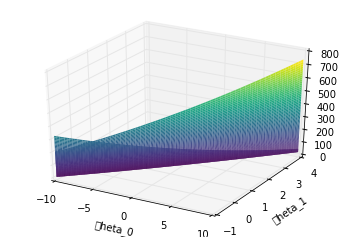

In [182]:
# surface plot 
fig=pp.figure()
#J_vals=np.transpose(J_vals)
ax=pp.axes(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals,rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('\theta_0')
ax.set_ylabel('\theta_1')

c:\python 35\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
c:\python 35\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


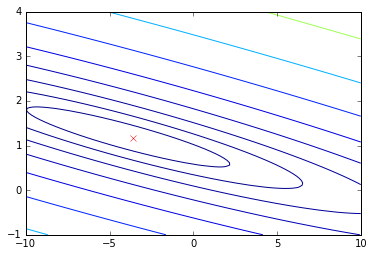

In [193]:
fig=pp.figure()

pp.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))

pp.plot(theta[0],theta[1],'rx')